In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatch
import seaborn as sn
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')
sn.set_theme(palette='deep', style = 'white')

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import statsmodels.formula.api as smf
import math
from scipy.stats import zscore, shapiro
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_auc_score, roc_curve, accuracy_score, f1_score, recall_score, precision_score

Problem 1: Linear Regression


You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.


Data Dictionary:


- Carat	- Carat weight of the cubic zirconia.
- Cut	 Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
- Color 	 Colour of the cubic zirconia.With D being the worst and J the best.
- Clarity	Clarity refers to the absence of the Inclusions and Blemishes. (In order from Worst to Best in terms of avg price) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1
- Depth	 The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
- Table	 The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
- Price	 the Price of the cubic zirconia.
- X	 Length of the cubic zirconia in mm.
- Y	 Width of the cubic zirconia in mm.
- Z	 Height of the cubic zirconia in mm.


#### 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [3]:
df = pd.read_csv('cubic_zirconia.csv')

In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [5]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [7]:
df.shape

(26967, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [9]:
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.80,0.48,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.75,1.41,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.46,2.23,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.73,1.13,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.73,1.17,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.54,0.72,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.52,4024.86,326.0,945.00,2375.00,5360.00,18818.00


In [10]:
round(df.describe(include = ['object']),2)

,cut,color,clarity
count,26967,26967,26967
unique,5,7,8
top,Ideal,G,SI1
freq,10816,5661,6571


## EDA


In [11]:
df.duplicated().sum()

34

In [12]:
df.drop_duplicates(inplace = True)

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(26933, 10)

In [15]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [16]:
## Univariate Analysis

df_num = df.select_dtypes(['float','int'])


def univariate(col):
    
    fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12,3))
    
    plt.suptitle('Univariate Analysis of ' +col, fontsize = 15)
    
    sn.histplot(df[col], kde = True, ax = axs[0], color = 'darkslateblue')
    sn.violinplot(df[col], ax = axs[1], notch = True, capprops = dict(color = 'chartreuse'), 
               
               boxprops = dict(facecolor = 'chartreuse', color = 'yellowgreen'),
                
              whiskerprops = dict(color = 'orange'))
    
    plt.tight_layout()

In [17]:
unilist = list(df_num.columns.values)

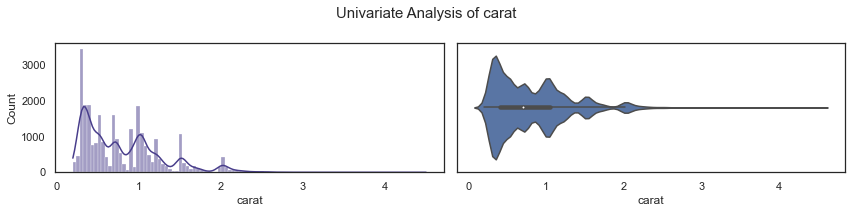

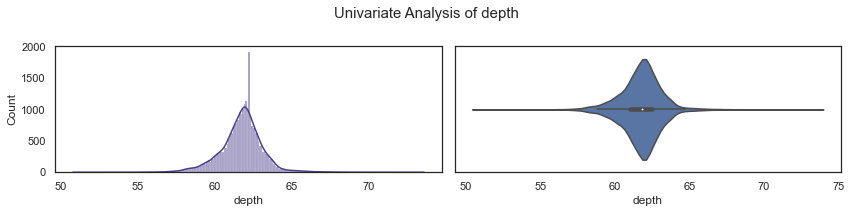

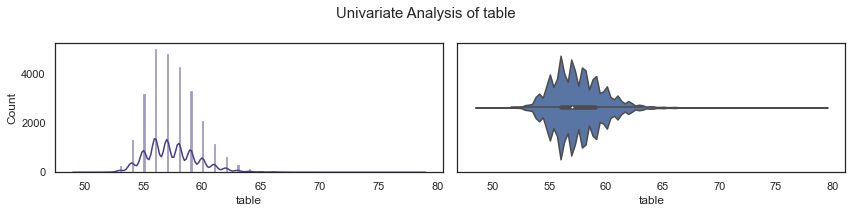

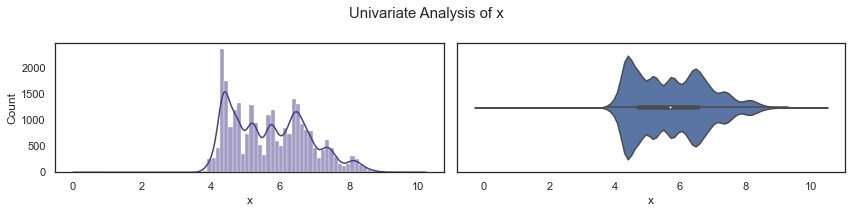

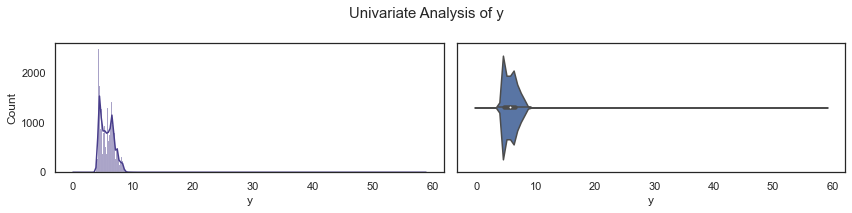

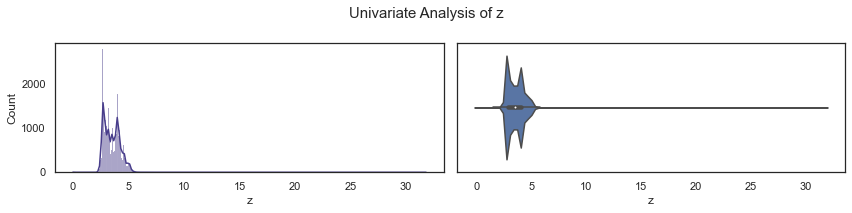

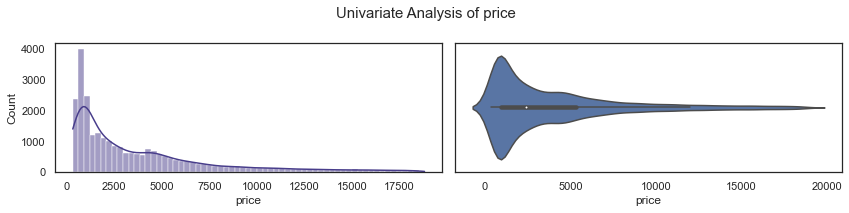

In [18]:
for i in unilist:
    univariate(i)

In [19]:
import scipy.stats as stats

round(pd.DataFrame({'Skewness' : [stats.skew(df.carat), stats.skew(df.depth), stats.skew(df.table), stats.skew(df.x), stats.skew(df.y), stats.skew(df.z), stats.skew(df.price)]}, index= ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']),2).T


,carat,depth,table,x,y,z,price
Skewness,1.11,NaN,0.77,0.39,3.87,2.58,1.62


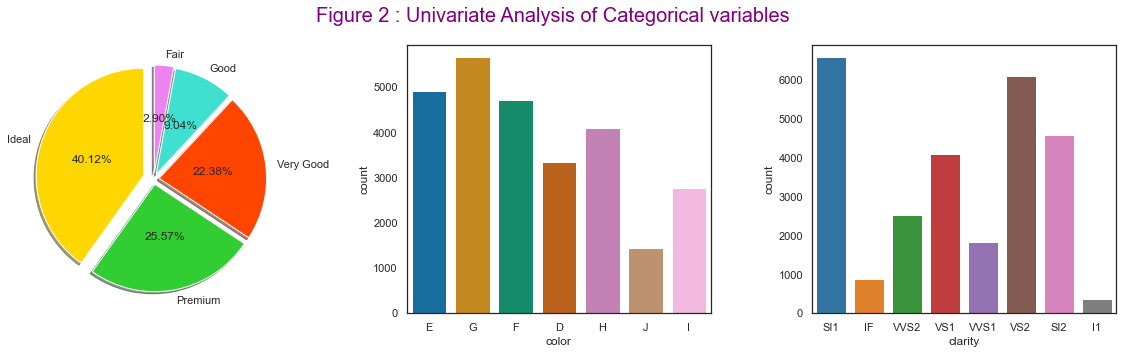

In [20]:
plt.figure(figsize = (16,5))

plt.subplot(131)
plt.pie(df.cut.value_counts().values, labels = df.cut.value_counts().index, startangle = 90, autopct = '%1.2f%%', shadow = True,
       explode = [0.1, 0.05,0.05,0.05, 0.06], pctdistance = 0.5, colors = ['gold', 'limegreen', 'orangered', 'turquoise', 'violet'],
       labeldistance = 1.1)

plt.subplot(132)
sn.countplot(df.color, palette = 'colorblind')

plt.subplot(133)
sn.countplot(df.clarity, palette = 'tab10')

plt.suptitle('Figure 2 : Univariate Analysis of Categorical variables', fontsize = 20, color = 'purple')
plt.tight_layout()
plt.show()

**Bivariate Analysis**

In [21]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(i, ':' '\n', '\n', df[i].value_counts())
        print('\n')

cut :
 
 Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64


color :
 
 G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64


clarity :
 
 SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64




In [22]:
corr = df_num.corr()
mask = np.triu(np.ones_like(corr, dtype = np.bool),k=1)

Text(0.5, 1.0, 'Figure 3: Correlation matrix')

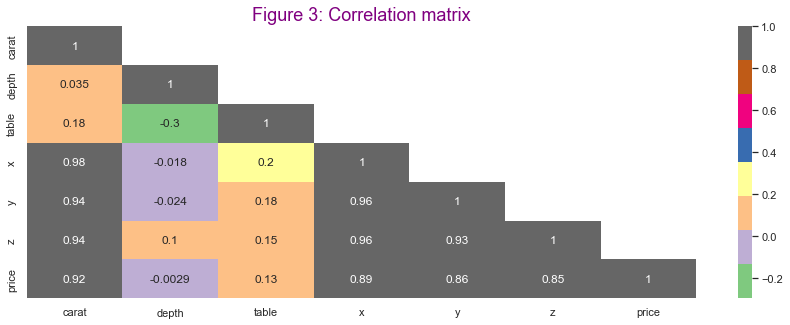

In [23]:
plt.figure(figsize=(15,5))
sn.heatmap(corr, annot = True, mask = mask, fmt = '.2g', cmap = 'Accent')
plt.title('Figure 3: Correlation matrix', color = 'purple', fontsize = 18)

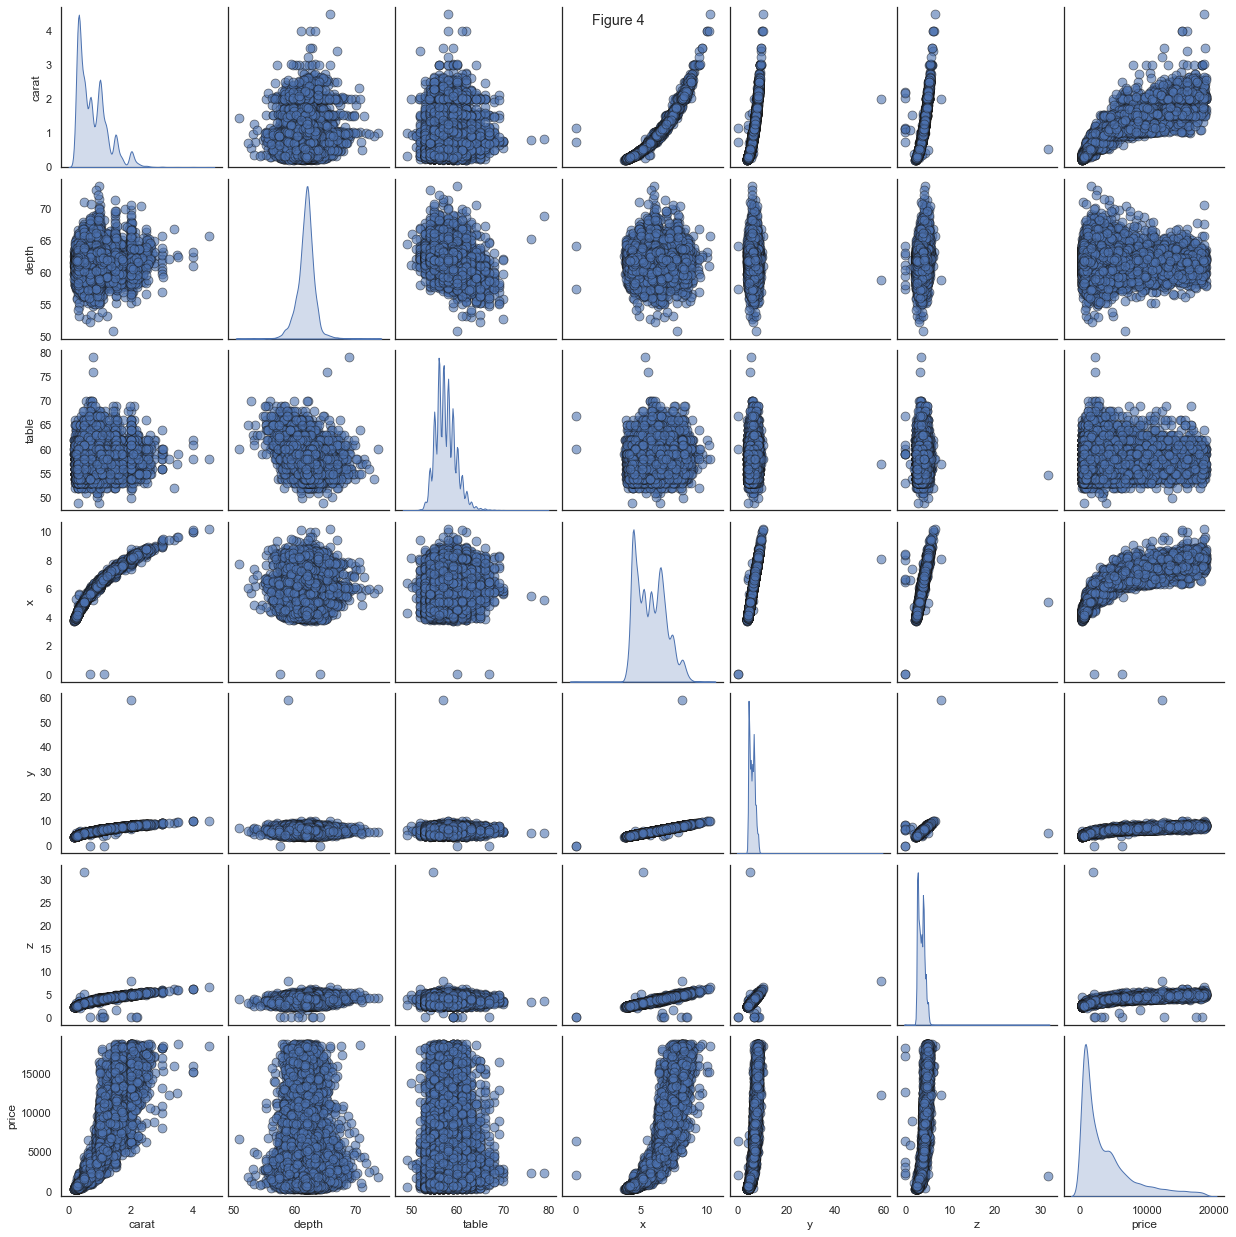

In [24]:
sn.pairplot(df_num, diag_kind='kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})
plt.suptitle('Figure 4')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [25]:
#sn.pairplot(df_num, x_vars = ['carat', 'depth', 'table', 'x', 'y', 'z'], y_vars=['price'], palette = 'virdis', kind = 'reg')

<AxesSubplot:xlabel='cut', ylabel='price'>

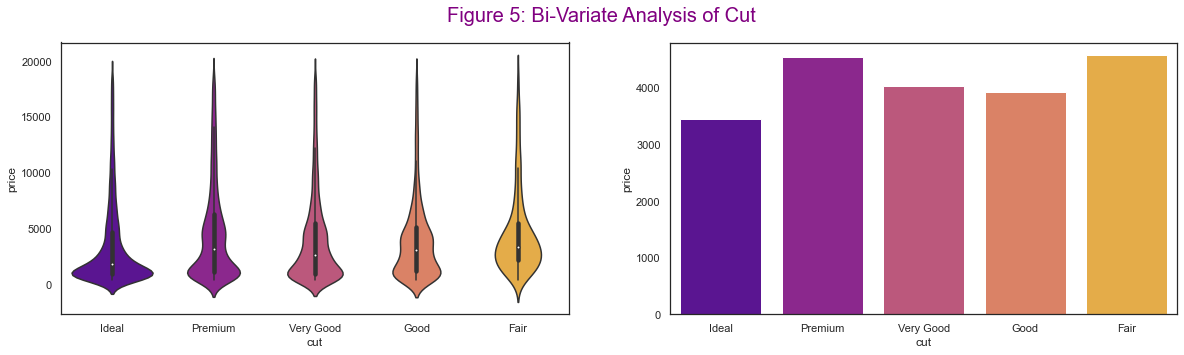

In [26]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))
plt.suptitle('Figure 5: Bi-Variate Analysis of Cut', fontsize = 20, color = 'purple')
sn.violinplot(x = df.cut, y = df.price, palette = 'plasma', ax = axs[0], showmeans = True)
sn.barplot(x = df.cut, y = df.price, palette = 'plasma', ax = axs[1], ci = None)

<AxesSubplot:xlabel='color', ylabel='price'>

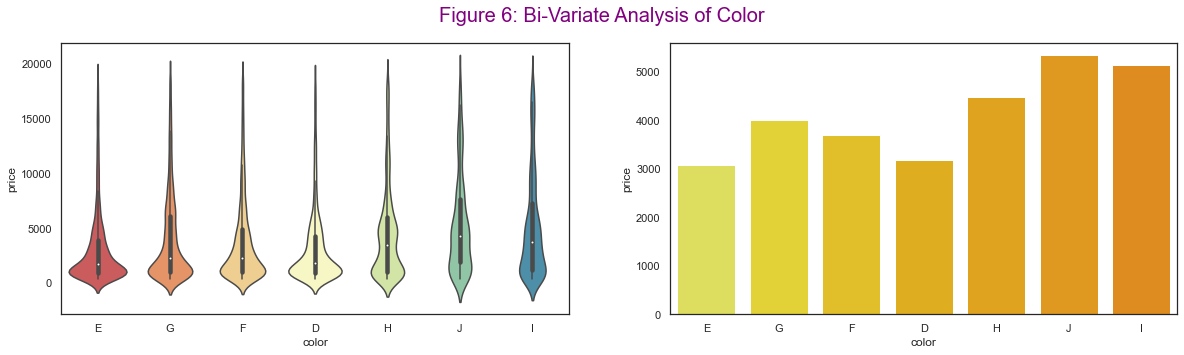

In [27]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))
plt.suptitle('Figure 6: Bi-Variate Analysis of Color', fontsize = 20, color = 'purple')
sn.violinplot(x = df.color, y = df.price, palette = 'Spectral', ax = axs[0], showmeans = True)
sn.barplot(x = df.color, y = df.price, palette = 'Wistia', ax = axs[1], ci = None)

<AxesSubplot:xlabel='clarity', ylabel='price'>

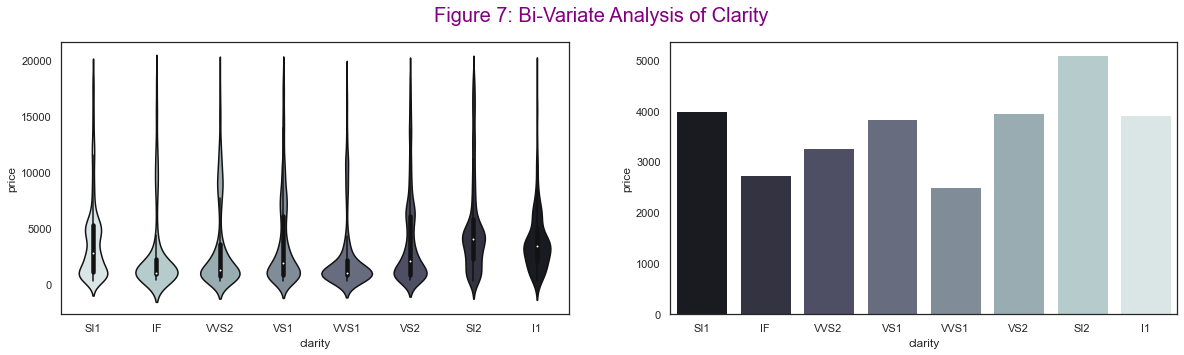

In [28]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))
plt.suptitle('Figure 7: Bi-Variate Analysis of Clarity', fontsize = 20, color = 'purple')
sn.violinplot(x = df.clarity, y = df.price, palette = 'bone_r', ax = axs[0], showmeans = True)
sn.barplot(x = df.clarity.sort_index(ascending = True), y = df.price, palette = 'bone', ax = axs[1], ci = None)

In [29]:
#df.groupby('clarity')['price'].mean()

### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

In [30]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [31]:
## Imputing null values

df = df.fillna(df.median())

In [32]:
pd.DataFrame(df.isnull().sum()).T

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0,0,0,0,0,0,0,0,0


In [33]:
df[(df['x'] == 0) & (df['y'] == 0) & (df['z'] == 0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [34]:
df.drop(index = [5821, 6034, 10827, 12498, 12689, 17506, 18194, 23758], axis = 0, inplace = True)

In [35]:
df.shape

(26925, 10)

In [36]:
df.describe()

,carat,depth,table,x,y,z,price
count,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000
mean,0.797821,61.746982,57.455305,5.729385,5.733152,3.538820,3936.249991
std,0.477085,1.393457,2.231327,1.126081,1.163820,0.717483,4020.983187
min,0.200000,50.800000,49.000000,3.730000,3.710000,1.070000,326.000000
25%,0.400000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2373.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5353.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [37]:
pd.DataFrame(df.clarity.value_counts()).T

,SI1,VS2,SI2,VS1,VVS2,VVS1,IF,I1
clarity,6564,6092,4561,4086,2530,1839,891,362


In [38]:
df.clarity = np.where(df.clarity == 'SI1', 'SI', df.clarity)
df.clarity = np.where(df.clarity == 'SI2', 'SI', df.clarity)
df.clarity = np.where(df.clarity == 'VS1', 'VS', df.clarity)
df.clarity = np.where(df.clarity == 'VS2', 'VS', df.clarity)
df.clarity = np.where(df.clarity == 'VVS1', 'VVS', df.clarity)
df.clarity = np.where(df.clarity == 'VVS2', 'VVS', df.clarity)

In [39]:
pd.DataFrame(df.clarity.value_counts().sort_values()).T

,I1,IF,VVS,VS,SI
clarity,362,891,4369,10178,11125


<AxesSubplot:xlabel='clarity', ylabel='price'>

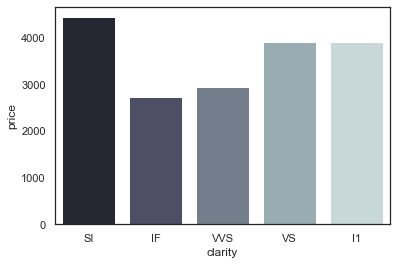

In [40]:
sn.barplot(x = df.clarity.sort_index(ascending = True), y = df.price, palette = 'bone', ci = None)

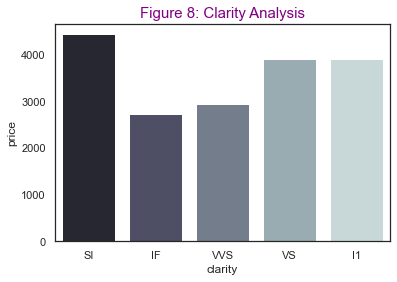

In [41]:
sn.barplot(x = df.clarity.sort_index(ascending = True), y = df.price, palette = 'bone', ci = None)
plt.title('Figure 8: Clarity Analysis', color = 'purple', fontsize = 15)
plt.show()

#### As we can observe, SI still happens to be the most priced category for diamond followed by VS and I1.

### 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [42]:
df.cut = np.where(df.cut == 'Fair', '0', df.cut)
df.cut = np.where(df.cut == 'Good', '1', df.cut)
df.cut = np.where(df.cut == 'Very Good', '2', df.cut)
df.cut = np.where(df.cut == 'Premium', '3', df.cut)
df.cut = np.where(df.cut == 'Ideal', '4', df.cut)

df.color = np.where(df.color == 'D', '6', df.color)
df.color = np.where(df.color == 'E', '5', df.color)
df.color = np.where(df.color == 'F', '4', df.color)
df.color = np.where(df.color == 'G', '3', df.color)
df.color = np.where(df.color == 'H', '2', df.color)
df.color = np.where(df.color == 'I', '1', df.color)
df.color = np.where(df.color == 'J', '0', df.color)

df.clarity = np.where(df.clarity == 'IF', '4', df.clarity)
df.clarity = np.where(df.clarity == 'VVS', '3', df.clarity)
df.clarity = np.where(df.clarity == 'VS', '2', df.clarity)
df.clarity = np.where(df.clarity =='SI', '1', df.clarity)
df.clarity = np.where(df.clarity == 'I1', '0', df.clarity)


In [43]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4,5,1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,3,3,4,60.8,58.0,4.42,4.46,2.70,984
2,0.90,2,5,3,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,4,4,2,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,4,4,3,60.4,59.0,4.35,4.43,2.65,779


In [44]:
#df['Data Type'] = df.dtypes

In [45]:
pd.DataFrame(df.dtypes).T

,carat,cut,color,clarity,depth,table,x,y,z,price
0,float64,object,object,object,float64,float64,float64,float64,float64,int64


In [46]:
df.cut = df.cut.astype('float')
df.color = df.color.astype('float')
df.clarity = df.clarity.astype('float')

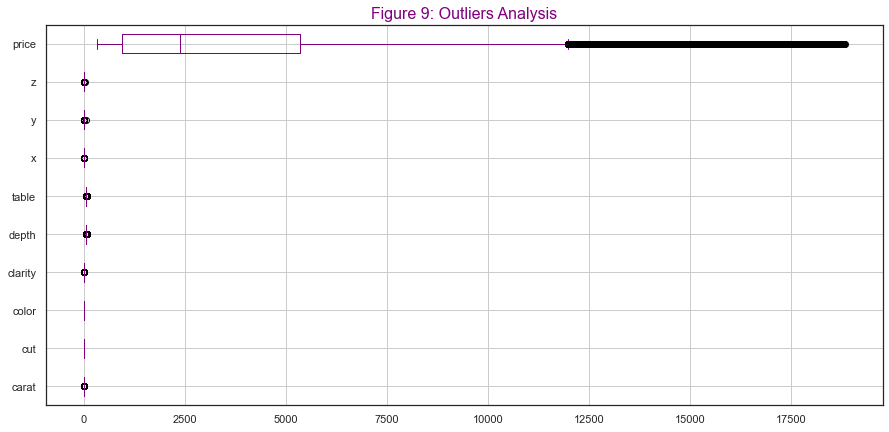

In [47]:
cont=df.dtypes.index
plt.figure(figsize=(15,7))
df[cont].boxplot(vert=0, color = 'purple')
plt.title('Figure 9: Outliers Analysis',fontsize=16, color = 'purple')
plt.show()

In [48]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [49]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

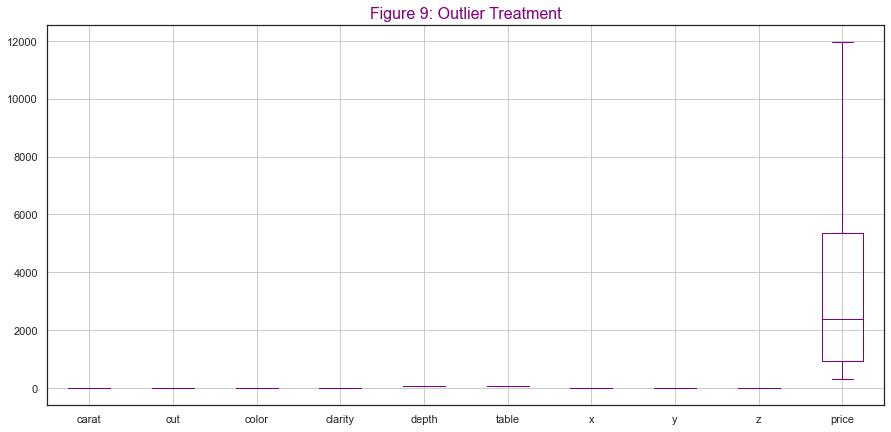

In [50]:
plt.figure(figsize=(15,7))
df[cont].boxplot(color = 'purple')
plt.title('Figure 9: Outlier Treatment',fontsize=16, color = 'purple')
plt.show()

In [51]:
df1 = df.copy()

In [52]:
x = df.drop('price', axis = 1)
y = df.pop('price')

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [54]:
## Applying Linear Regression

reg_model = LinearRegression()
reg_model.fit(x_train, y_train)
#y_train.head()

LinearRegression()

In [55]:
# Checking coeff

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, round((reg_model.coef_)[idx]),2))

The coefficient for carat is 8849
The coefficient for cut is 112
The coefficient for color is 262
The coefficient for clarity is 848
The coefficient for depth is 34
The coefficient for table is -17
The coefficient for x is -1461
The coefficient for y is 1653
The coefficient for z is -954


In [56]:
intercept = reg_model.intercept_
print('The intercept for our model is {}'.format(round(intercept),2))

The intercept for our model is -4827


In [57]:
print('The accuracy for trained model is:-', round(reg_model.score(x_train, y_train),2))

The accuracy for trained model is:- 0.93


In [58]:
print('The accuracy for test model is:-', round( reg_model.score(x_test, y_test), 2))

The accuracy for test model is:- 0.93


R-square i.e. coefficient of determinant determines the accuracy or efficiency of training & test set and for our regression model, we have observed score of 93% approx. for both training & testing set which indicates that model can be a right fit model.

In [59]:
## Predictions on training & test

y_pred_train = reg_model.predict(x_train)
y_pred_test = reg_model.predict(x_test)

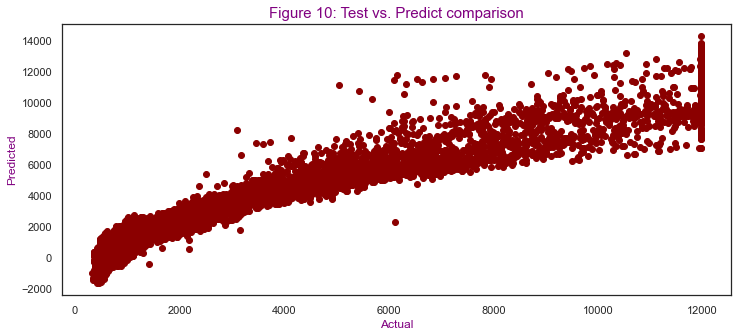

In [60]:
plt.figure(figsize = (12,5))
plt.scatter(y_test, y_pred_test, color = 'darkred')
plt.ylabel('Predicted', color = 'purple')
plt.xlabel('Actual', color = 'purple')
plt.title('Figure 10: Test vs. Predict comparison', color = 'purple', fontsize = 15)
plt.show()

In [61]:
## RMSE on training data

import math

rmse_reg_train = math.sqrt(np.mean((y_pred_train - y_train)**2))
print('Root mean square of training data is', round(rmse_reg_train,2))

## RMSE on test data

rmse_reg_test = math.sqrt(np.mean((y_pred_test - y_test)**2))
print('Root mean square of testing data is', round(rmse_reg_test, 2))

Root mean square of training data is 924.14
Root mean square of testing data is 927.99


In [62]:
## Statsmodels

df_train = pd.concat([x_train, y_train], axis = 1)
df_test = pd.concat([x_test, y_test], axis = 1)

In [63]:
df_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
5030,1.10,1.0,5.0,1.0,63.3,56.0,6.53,6.58,4.15,4065.0
12108,1.01,2.0,6.0,1.0,64.0,56.0,6.30,6.38,4.06,5166.0
20181,0.67,1.0,1.0,2.0,60.7,61.4,5.60,5.64,3.41,1708.0
4712,0.76,1.0,3.0,1.0,59.0,63.0,6.05,5.97,3.47,2447.0
2548,1.01,3.0,3.0,2.0,62.8,59.0,6.37,6.34,3.99,6618.0


In [64]:
df_test.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
11971,1.510,2.0,1.0,1.0,63.0,59.0,7.26,7.31,4.59,8758.0
3294,1.020,3.0,3.0,1.0,60.8,58.0,6.50,6.46,3.94,4718.0
25427,2.025,3.0,6.0,1.0,60.0,58.0,8.31,8.23,4.96,11965.0
709,1.710,2.0,4.0,2.0,61.9,61.0,7.61,7.67,4.73,11965.0
8010,1.500,1.0,2.0,2.0,63.9,59.0,7.25,7.18,4.61,8165.0


In [65]:
## variance inflation

#vif = pd.DataFrame()
vif = [variance_inflation_factor(x.values, ix) for ix in range(x.shape[1])]
#vif['Features'] = x.columns

In [66]:
i = 0

for column in x.columns:
    if i<11:
        print('VIF for {} is: {}'.format(column, round(vif[i],2)))
        i+=1
            

VIF for carat is: 122.97
VIF for cut is: 10.32
VIF for color is: 5.51
VIF for clarity is: 7.0
VIF for depth is: 1220.72
VIF for table is: 874.13
VIF for x is: 10669.97
VIF for y is: 9417.87
VIF for z is: 3320.47


In [67]:
## statsmodels

expr = 'price ~ carat + cut + color + clarity + depth + table + x + y + z'
stats_model = smf.ols(expr, data = df_train).fit()


In [68]:
pd.DataFrame(round(stats_model.params,2)).T

,Intercept,carat,cut,color,clarity,depth,table,x,y,z
0,-4826.73,8848.57,112.1,262.15,847.95,33.61,-17.02,-1461.11,1652.53,-953.51


In [69]:
stats_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.722e+04
Date:                Sat, 13 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:45:53   Log-Likelihood:            -1.5545e+05
No. Observations:               18847   AIC:                         3.109e+05
Df Residuals:                   18837   BIC:                         3.110e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4826.7285    815.423     -5.919      0.000   -6425.030   -3228.427
carat       8848.5715     84.199    105.091      0.000    8683.534    9013.609
cut          112.0991      7.455     15.036      0.000      97.486     126.712
color        262.1516      4.171     62.851      0.000     253.976     270.327
clarity      847.9543      9.197     92.200      0.000     829.928     865.981
depth         33.6083     11.302      2.974      0.003      11.456      55.761
table        -17.0220      3.987     -4.269      0.000     -24.837      -9.207
x          -1461.1109    137.885    -10.597      0.000   -1731.378   -1190.843
y           1652.5259    135.540     12.192      0.000    1386.855    1918.197
z           -953.5113    141.708     -6.729      0.000   -1231.271    -675.752
==============================================================================
Omnibus:                     2805.028   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8932.300
Skew:                           0.767   Prob(JB):                         0.00
Kurtosis:                       6.003   Cond. No.                     1.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
pred_sm_train = stats_model.predict(x_train)
pred_sm_test = stats_model.predict(x_test)

In [71]:
## RMSE on training data

import math

rmse_sm_train = math.sqrt(np.mean((pred_sm_train - y_train)**2))
print('Root mean square of Scaled training data is', round(rmse_sm_train,2))

## RMSE on test data

rmse_sm_test = math.sqrt(np.mean((pred_sm_test - y_test)**2))
print('Root mean square of Scaled testing data is', round(rmse_sm_test, 2))

Root mean square of Scaled training data is 924.14
Root mean square of Scaled testing data is 927.99


In [72]:
## Scaling

df1 = df1.apply(zscore)

x1 = df1.drop('price', axis = 1)
y1 = df1.pop('price')

## new train test split for scaled

x_train_sc, x_test_sc, y_train_sc, y_test_sc = train_test_split(x1, y1, test_size=0.30, random_state=123)

In [73]:
## new model with scaled variables

lin_model = LinearRegression()
lin_model.fit(x_train_sc, y_train_sc)

LinearRegression()

In [74]:
# Checking coeff

for idx, col_name in enumerate(x_train_sc.columns):
    print("The coefficient for {} is {}".format(col_name, round((lin_model.coef_)[idx]),2))

The coefficient for carat is 1
The coefficient for cut is 0
The coefficient for color is 0
The coefficient for clarity is 0
The coefficient for depth is 0
The coefficient for table is 0
The coefficient for x is 0
The coefficient for y is 1
The coefficient for z is 0


In [75]:
print('The Intercept of scaled data is: {}'.format(round(lin_model.intercept_),2))

The Intercept of scaled data is: 0


In [76]:
print('The accuracy for Scaled trained model is:-', round(lin_model.score(x_train_sc, y_train_sc),2))

The accuracy for Scaled trained model is:- 0.93


In [77]:
print('The accuracy for Scaled test model is:-', round( lin_model.score(x_test_sc, y_test_sc), 2))

The accuracy for Scaled test model is:- 0.93


In [78]:
## Predictions on training & test

y_pred_sc_train = lin_model.predict(x_train_sc)
y_pred_sc_test = lin_model.predict(x_test_sc)

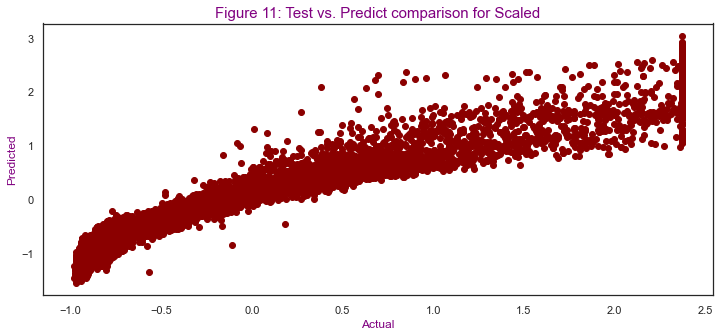

In [79]:
plt.figure(figsize = (12,5))
plt.scatter(y_test_sc, y_pred_sc_test, color = 'darkred')
plt.ylabel('Predicted', color = 'purple')
plt.xlabel('Actual', color = 'purple')
plt.title('Figure 11: Test vs. Predict comparison for Scaled', color = 'purple', fontsize = 15)
plt.show()

The figure illustrates strength of dependency between target and predicted variable thus a linear plot, moderate correlation. However, there are lots of spread which indicates noise present in the data.

In [80]:
## RMSE on scaled training data

import math

rmse_reg_sc_train = math.sqrt(np.mean((y_pred_sc_train - y_train_sc)**2))
print('Root mean square of Scaled training data is', round(rmse_reg_sc_train,2))

## RMSE on scaled test data

rmse_reg_sc_test = math.sqrt(np.mean((y_pred_sc_test - y_test_sc)**2))
print('Root mean square of Scaled testing data is', round(rmse_reg_sc_test, 2))

Root mean square of Scaled training data is 0.27
Root mean square of Scaled testing data is 0.27


In [81]:
## Statsmodels (Scaled)

df_train_sc = pd.concat([x_train_sc, y_train_sc], axis = 1)
df_test_sc = pd.concat([x_test_sc, y_test_sc], axis = 1)

In [82]:
## variance inflation

#vif = pd.DataFrame()
vif_sc = [variance_inflation_factor(x1.values, ix) for ix in range(x1.shape[1])]
#vif['Features'] = x.columns

In [83]:
i = 0

for column in x1.columns:
    if i<11:
        print('VIF for scaled {} is: {}'.format(column, round(vif_sc[i],2)))
        i+=1
            

VIF for scaled carat is: 32.94
VIF for scaled cut is: 1.51
VIF for scaled color is: 1.11
VIF for scaled clarity is: 1.21
VIF for scaled depth is: 4.45
VIF for scaled table is: 1.62
VIF for scaled x is: 417.0
VIF for scaled y is: 398.36
VIF for scaled z is: 234.85


In [84]:
## statsmodels

expr_sc = 'price ~ carat + cut + color + clarity + depth + table + x + y + z'
stats_model_sc = smf.ols(expr_sc, data = df_train_sc).fit()


In [85]:
pd.DataFrame(round(stats_model_sc.params,2)).T

,Intercept,carat,cut,color,clarity,depth,table,x,y,z
0,0.0,1.17,0.04,0.13,0.2,0.02,-0.01,-0.41,0.51,-0.22


In [86]:
stats_model_sc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.755e+04
Date:                Sat, 13 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:45:54   Log-Likelihood:                -1876.8
No. Observations:               18847   AIC:                             3774.
Df Residuals:                   18837   BIC:                             3852.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0030      0.002      1.515      0.130      -0.001       0.007
carat          1.1662      0.011    104.393      0.000       1.144       1.188
cut            0.0352      0.002     14.653      0.000       0.031       0.040
color          0.1303      0.002     63.480      0.000       0.126       0.134
clarity        0.1974      0.002     92.032      0.000       0.193       0.202
depth          0.0150      0.004      3.528      0.000       0.007       0.023
table         -0.0085      0.002     -3.405      0.001      -0.013      -0.004
x             -0.4103      0.042     -9.867      0.000      -0.492      -0.329
y              0.5106      0.041     12.557      0.000       0.431       0.590
z             -0.2197      0.031     -7.007      0.000      -0.281      -0.158
==============================================================================
Omnibus:                     2740.290   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8634.128
Skew:                           0.753   Prob(JB):                         0.00
Kurtosis:                       5.954   Cond. No.                         57.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
x3 = x1.copy()
x3.drop('x', axis = 1, inplace = True)
vif_1 = [variance_inflation_factor(x3.values, ix) for ix in range(x3.shape[1])]

In [88]:
i = 0

for column in x3.columns:
    print(column, round(vif_1[i],2))
    i+=1

carat 31.9
cut 1.5
color 1.11
clarity 1.2
depth 4.12
table 1.59
y 206.92
z 204.28


In [89]:
expr2 = 'price ~ cut + color + clarity + depth + table + x + y + z'
stats_model_2 = smf.ols(expr2, data = df_train_sc).fit()

In [90]:
stats_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                 1.878e+04
Date:                Sat, 13 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:45:54   Log-Likelihood:                -6178.6
No. Observations:               18847   AIC:                         1.238e+04
Df Residuals:                   18838   BIC:                         1.245e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0033      0.002      1.332      0.183      -0.002       0.008
cut            0.0390      0.003     12.913      0.000       0.033       0.045
color          0.1088      0.003     42.390      0.000       0.104       0.114
clarity        0.2190      0.003     81.645      0.000       0.214       0.224
depth          0.0451      0.005      8.459      0.000       0.035       0.056
table          0.0053      0.003      1.706      0.088      -0.001       0.011
x              0.2801      0.052      5.430      0.000       0.179       0.381
y              0.6817      0.051     13.355      0.000       0.582       0.782
z              0.0703      0.039      1.791      0.073      -0.007       0.147
==============================================================================
Omnibus:                      878.468   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1004.768
Skew:                           0.564   Prob(JB):                    6.57e-219
Kurtosis:                       2.910   Cond. No.                         50.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
## RMSE of train data

mse_train_sc = np.mean((stats_model_sc.predict(df_train_sc.drop('price', axis = 1)) - df_train_sc['price'])**2)
print('Root Mean Square of Error for Scaled Trained data is:-',round(np.sqrt(mse_train_sc),2))

## RMSE of test data

mse_test_sc = np.mean((stats_model_sc.predict(df_test_sc.drop('price', axis = 1)) - df_test_sc['price'])**2)
print('Mean Square of Error for Scaled Test data is:-',round(np.sqrt(mse_test_sc),2))

Root Mean Square of Error for Scaled Trained data is:- 0.27
Mean Square of Error for Scaled Test data is:- 0.27


In [98]:
for i, j in np.array(stats_model_sc.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i), end = ' ')

(0.0) * Intercept + (1.17) * carat + (0.04) * cut + (0.13) * color + (0.2) * clarity + (0.02) * depth + (-0.01) * table + (-0.41) * x + (0.51) * y + (-0.22) * z + 

### 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

**Step 1: EDA**

1. Price is the target variable while all other are the predictors variables. Dataset consists of 26967 rows and 11 columns overall with 6 floats, 1 Integer and 3 object data types. Futhermore, a total of 697 null values has been observed in depth column and 34 duplicate values which is 0.12% of the total data hence can be dropped. Also, Unnamed seems to be a column of no relevance, hence can be removed from further analysis.
2.  Price ranges from 326.0 to 18818.0 whereas length, width and height seems to have '0' as minimum value which is not ideal for our case study needs to be further observed.
3. Heavy skewness has been observed in continous attributes with all the features are positive or right skewed except 'Depth' which may not be reliable due to presence of null values and 'x' which happens to be slightly left skewed.
4. For most of the features in the sample, outliers are present which indicates that there are extreme values in the dataset.
5. 'Ideal' cut seems to dominate the data with 40% variables followed by color 'G' and clarity 'SI1' with 5653 & 6565 data points respectively.
6. A very strong positive correlation has been observed between Price and carat in such a way that if carat increase, price would also increase for diamond however it is quite evident from Figure that majority of the high-end pricing belongs to carat ranging from 1-2. Similarly, x,y and z also shares a strong positive correlation with pricing but not a linear one. For depth and table, data seems pretty scattered forming a cloud which could be due to lot of noise and/or presence of multicollinearity.
7. Pricing has been expensive for Fair cut with an average spend of 4579.24 as well as for 'J' color with spend of 5329.70, 'I' happens to be best though. Moreover, SI1 happens to be the most expensive clarity category for Gems with an average spend of 5088.86 followed by VS2 at 3965.69. Please observe that neither of the clarity techniques are best in categorization.

**Step 2 Linear Regression and Stats modelling**


Final Linear Regression equation lies as follow:

*(-4826.73) * Intercept + (8848.57) * carat + (112.1) * cut + (262.15) * color + (847.95) * clarity + (33.61) * depth + (-17.02) * table + (-1461.11) * x + (1652.53) * y + (-953.51) * z*

- When carat increases by one unit, diamond price increases by 8848.57 units, keeping all other predictors constant.
- When cut increases by one unit, diamond price increases by 112.1 units, keeping all other predictors constant.
- When color increases by one unit, diamond price increases by 262.15 units, keeping all other predictors constant.
- When clarity increases by one unit, diamond price increases by 847.95 units, keeping all other predictors constant.
- When depth increases by one unit, diamond price increases by 33.61 units, keeping all other predictors constant.
- When width (y) increases by one unit, diamond price increases by 1652.53 units, keeping all other predictors constant.
---
- carat, cut, color, clarity and width (y) happens to be most pivotal attributes for predicting the price.

-  Linear relation can be seen between actual Target variable 'y' and predicted variable 'y' however with plethora of data spread which is an indication of noise i.e. unexplained variance in the data.

- As the training and testing set are almost inline with efficiency of 93% approx., we can derive to the fact that model can be treated as right-fit.


**Statsmodels**

- VIF (Variance Inflation Factor) helped us to determine the strength of collinearity among predictors which helped us to built several stats models and compare efficiency and p-val for the best fit.

- We can see that R-squared and Adjusted R-square are the same i.e. **0.929** with overall P-value is less than alpha.


- Presented dataset is having length 'x' and height 'z' in cubic mm with negative coefficience and since the p-val is also less than 0.05 for the attributes, we can conclude that higher the length and height of the dimond, lesser the price will be.

- Nevertheless, width 'y' happens to have a positive co-efficience and p-val less than 0.05, hence, more the width of gem stone, higher the price will be.


**Recommendations:**

- The 'Fair Cut' or 'Less Ideal Cut' on diamond has been the most expensive followed by 'Premium' cut hence these should be considered for high profitable stones.
- Price has an increasing trend with width 'y' hence business should focus on stones with higher width.
- Business are recommended to produce gems with less height to increase profitibility as great height might lead to dark appearance that could cause less profits.
-  Focus should be on producing a flat diamond comparatively with less 'Table' for appropriate direction of light as this will lead to more profits.
- Claimed clarity technique 'I1' as best seems to be generating comparatively less price hence it is recommended for Business to relook the prices which might elevate the profits.

--------
------------


## **Problem 2: Logistic Regression and LDA**


You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [1200]:
mydata = pd.read_csv('Holiday_Package.csv')

In [1201]:
mydata.shape

(872, 8)

In [1202]:
mydata.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [1203]:
mydata.drop('Unnamed: 0', axis = 1, inplace = True)

In [1204]:
mydata.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [1205]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [1206]:
mydata.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [1207]:
mydata.duplicated().sum()

0

In [1208]:
round(mydata.describe(),2)

,Salary,age,educ,no_young_children,no_older_children
count,872.00,872.00,872.00,872.00,872.00
mean,47729.17,39.96,9.31,0.31,0.98
std,23418.67,10.55,3.04,0.61,1.09
min,1322.00,20.00,1.00,0.00,0.00
25%,35324.00,32.00,8.00,0.00,0.00
50%,41903.50,39.00,9.00,0.00,1.00
75%,53469.50,48.00,12.00,0.00,2.00
max,236961.00,62.00,21.00,3.00,6.00


In [1209]:
round(mydata.describe(include = ['object']),2)

,Holliday_Package,foreign
count,872,872
unique,2,2
top,no,no
freq,471,656


In [1210]:
print(mydata.Holliday_Package.value_counts())
print('\n')
print(round(mydata.Holliday_Package.value_counts(normalize=True)*100,2))

no     471
yes    401
Name: Holliday_Package, dtype: int64


no     54.01
yes    45.99
Name: Holliday_Package, dtype: float64


In [1211]:
print(mydata.foreign.value_counts())
print('\n')
print(round(mydata.foreign.value_counts(normalize=True)*100),2)

no     656
yes    216
Name: foreign, dtype: int64


no     75.0
yes    25.0
Name: foreign, dtype: float64 2


In [1212]:
mydata_num = mydata.select_dtypes('int')
mydata_cat = mydata.select_dtypes('object')

In [1213]:
#sn.histplot(mydata_num)

In [1214]:
def univariate_analysis1(column):
   
    fig,axs = plt.subplots(nrows=1,ncols = 2, figsize=(12,3))
    
    plt.suptitle('Univariate Analysis of  ' +column, fontsize = 15, color = 'purple')
    
    sn.histplot(mydata_num[column], kde=True, ax=axs[0], color = 'gold', element = 'poly')
    
    sn.boxplot(x=mydata_num[column], ax=axs[1], notch = True, capprops = dict(color = 'violet'),
               boxprops = dict(facecolor = 'blue', color = 'darkcyan'), 
               whiskerprops = dict(color = 'orange'))
    
    
    plt.tight_layout()

In [1215]:
listcol = mydata_num.columns

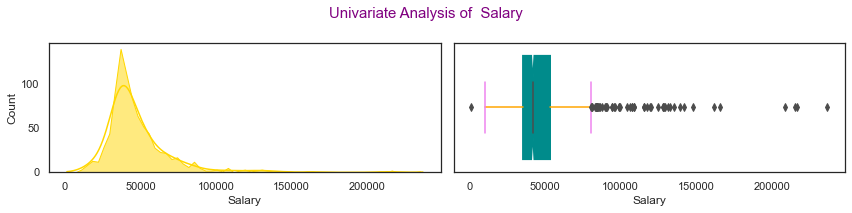

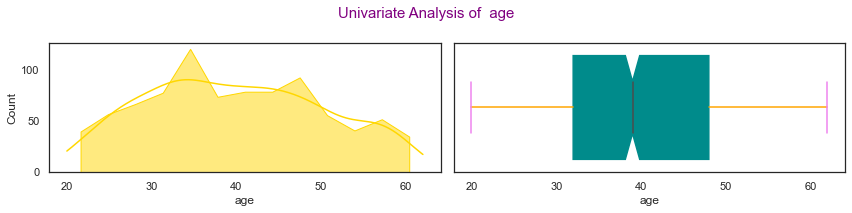

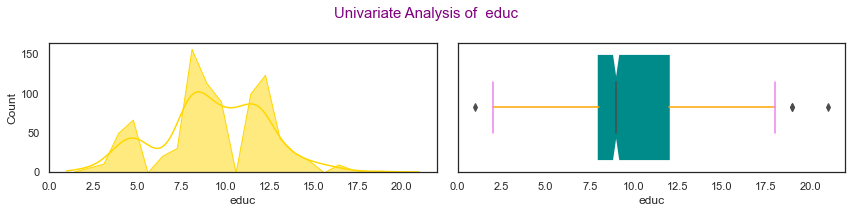

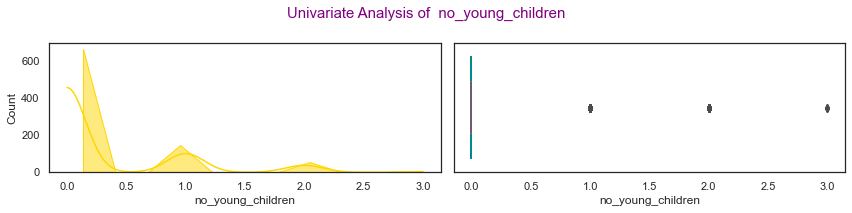

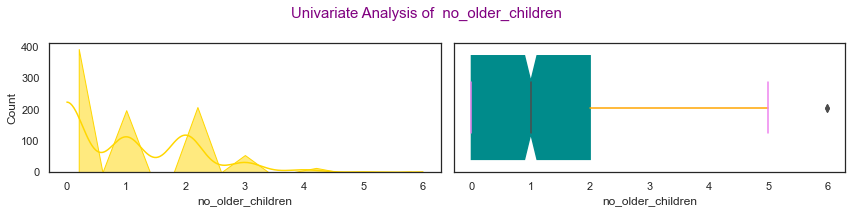

In [1216]:
for i in listcol:
    univariate_analysis1(i)

In [1217]:
import scipy.stats as stats

round(pd.DataFrame({'Skewness' : [stats.skew(mydata.Salary), stats.skew(mydata.age), stats.skew(mydata.educ), stats.skew(mydata.no_older_children), stats.skew(mydata.no_young_children)]}, index= ['Salary', 'Age', 'Education','Older Children', 'Younger Children']).T,2)


,Salary,Age,Education,Older Children,Younger Children
Skewness,3.1,0.15,-0.05,0.95,1.94


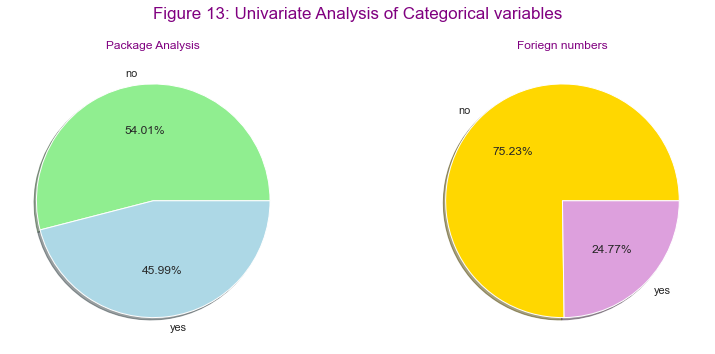

In [1218]:
plt.figure(figsize = (12,5))
plt.suptitle('Figure 13: Univariate Analysis of Categorical variables', color = 'purple', fontsize = 17)
plt.subplot(121)
plt.pie(mydata.Holliday_Package.value_counts(), labels = mydata.Holliday_Package.value_counts().index, autopct = '%1.2f%%', shadow = True, colors = ['lightgreen', 'lightblue'])
plt.title('Package Analysis', color = 'purple')

plt.subplot(122)
plt.pie(mydata.foreign.value_counts(), labels = mydata.foreign.value_counts().index, autopct = '%1.2f%%', shadow = True, colors = ['gold', 'plum'])
plt.title('Foriegn numbers', color = 'purple')
plt.tight_layout()

plt.show()

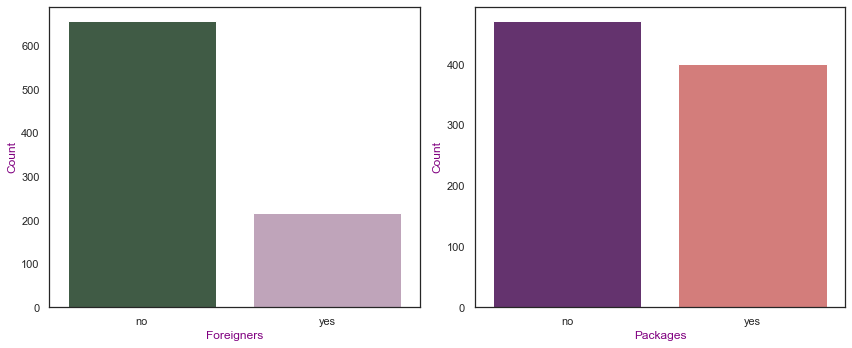

In [1219]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sn.countplot(mydata.foreign, dodge = False, palette = 'cubehelix', saturation=0.4)
plt.xlabel('Foreigners', color = 'purple')
plt.ylabel('Count', color = 'purple')
plt.tight_layout()


plt.subplot(122)
sn.countplot(mydata.Holliday_Package, dodge = False, palette = 'magma', saturation=0.6)
plt.xlabel('Packages', color = 'purple')
plt.ylabel('Count', color = 'purple')
plt.tight_layout()
plt.show()

**Bi-Variate Analysis**

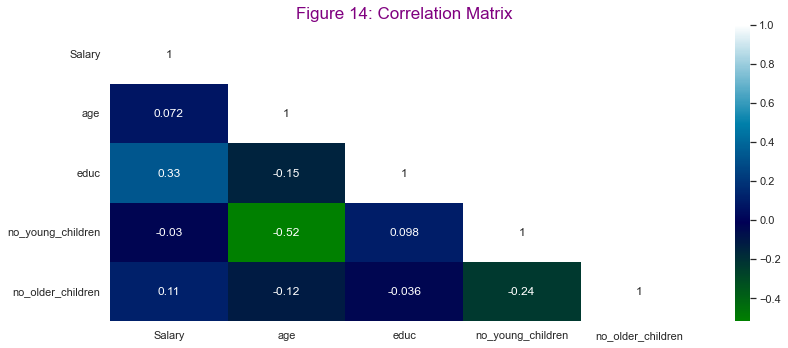

In [1220]:
sn.set_theme(style = 'white')
plt.figure(figsize=(12,5))
mask = np.triu(np.ones_like(mydata_num.corr(), dtype = np.bool), k = 1)
sn.heatmap(mydata_num.corr(), annot = True, mask = mask, cmap = 'ocean')
plt.title('Figure 14: Correlation Matrix', color = 'purple', fontsize = 17)
plt.tight_layout()
plt.show()

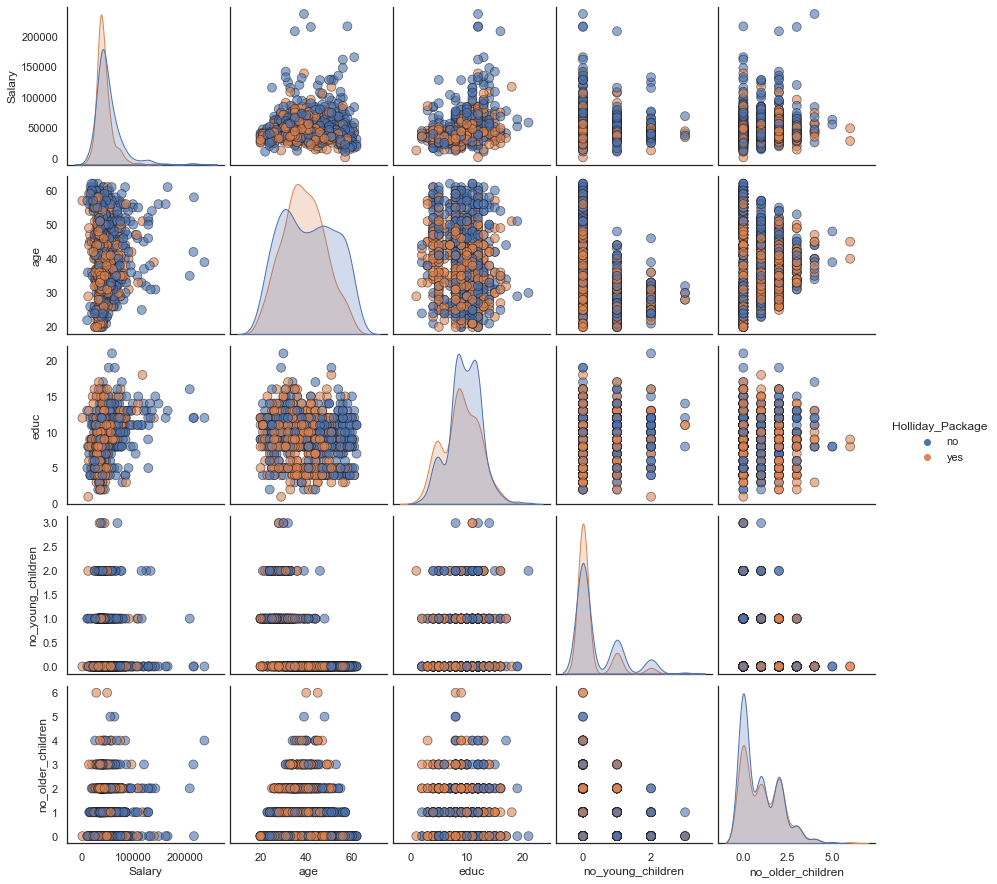

In [1221]:
sn.pairplot(mydata, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, hue = 'Holliday_Package')
plt.show()

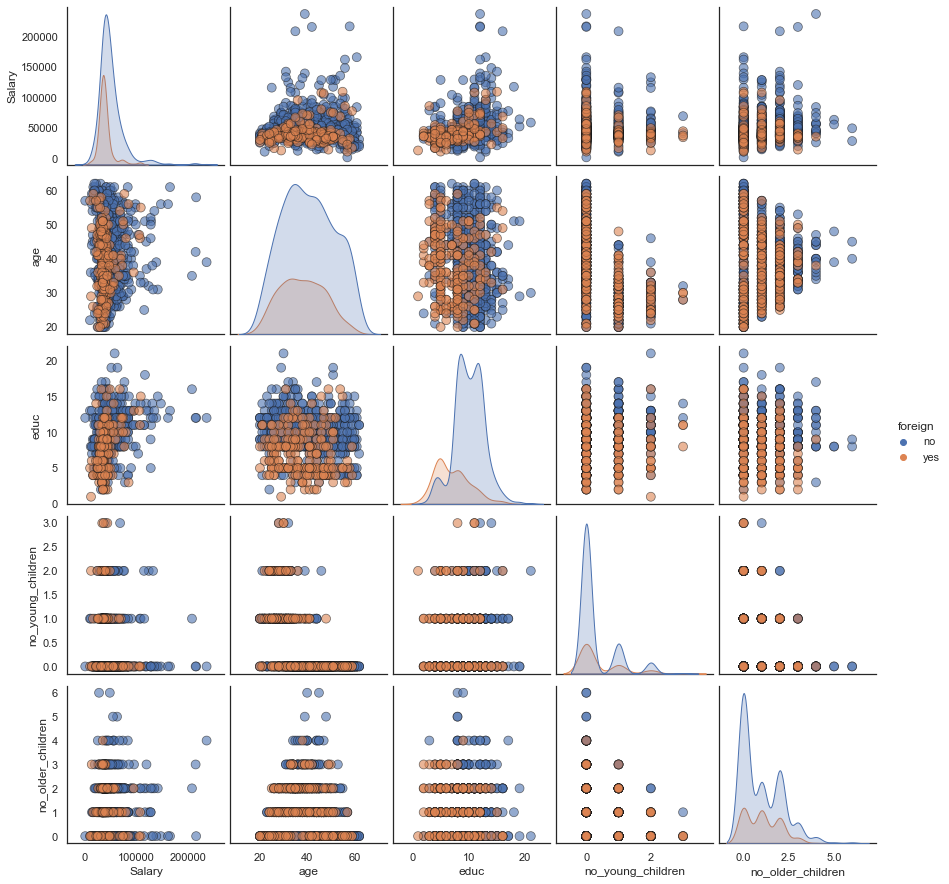

In [1222]:
sn.pairplot(mydata, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, hue = 'foreign')
plt.show()

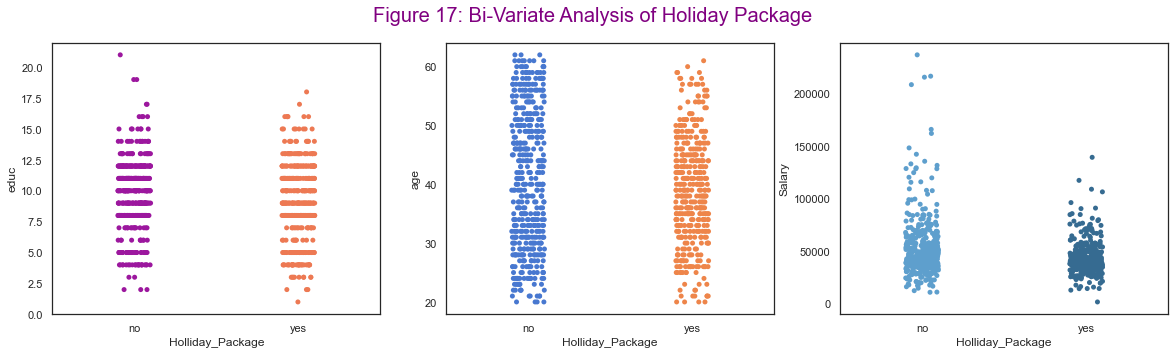

In [1223]:
sn.set_theme(style = 'white')
plt.figure(figsize = (20,5))
plt.suptitle('Figure 17: Bi-Variate Analysis of Holiday Package', fontsize = 20, color = 'purple')
plt.subplot(131)
sn.stripplot(x = mydata.Holliday_Package, y = mydata.educ, palette = 'plasma')
plt.subplot(132)
sn.stripplot(x = mydata.Holliday_Package, y = mydata.age, palette = 'muted')
plt.subplot(133)
sn.stripplot(x = mydata.Holliday_Package, y = mydata.Salary, palette = 'Blues_d')
plt.show()

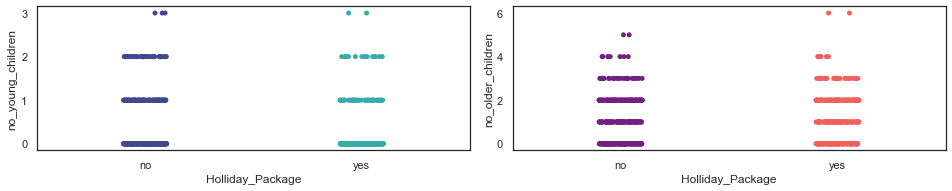

In [1224]:
plt.figure(figsize = (20,5))

plt.subplot(231)
sn.stripplot(x = mydata.Holliday_Package, y = mydata.no_young_children, palette = 'mako')
plt.subplot(232)
sn.stripplot(x = mydata.Holliday_Package, y = mydata.no_older_children, palette = 'magma')
plt.tight_layout()
plt.show()

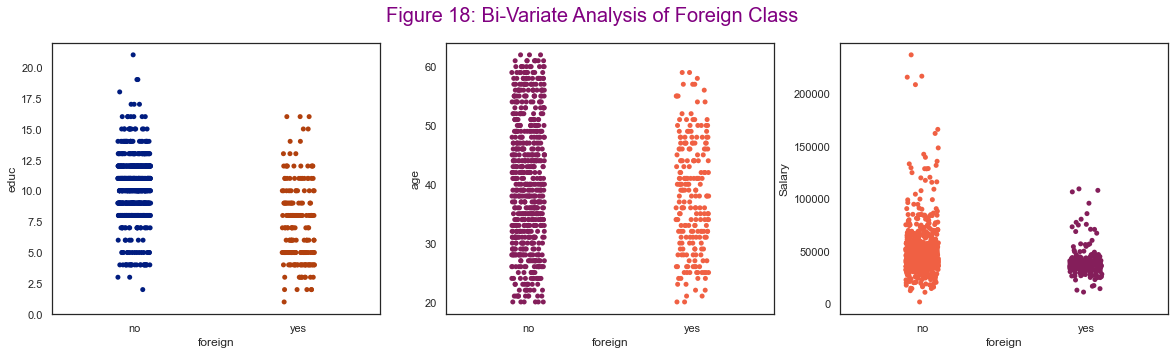

In [1225]:
plt.figure(figsize = (20,5))
plt.suptitle('Figure 18: Bi-Variate Analysis of Foreign Class', fontsize = 20, color = 'purple')
plt.subplot(131)
sn.stripplot(x = mydata.foreign, y = mydata.educ, palette = 'dark')
plt.subplot(132)
sn.stripplot(x = mydata.foreign, y = mydata.age, palette = 'rocket')
plt.subplot(133)
sn.stripplot(x = mydata.foreign, y = mydata.Salary, palette = 'rocket_r')

plt.show()

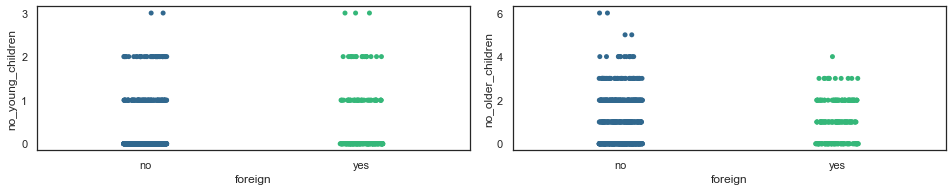

In [1226]:
plt.figure(figsize = (20,5))

plt.subplot(231)
sn.stripplot(x = mydata.foreign, y = mydata.no_young_children, palette = 'viridis')
plt.subplot(232)
sn.stripplot(x = mydata.foreign, y = mydata.no_older_children, palette = 'viridis')
plt.tight_layout()
plt.show()

### **Multivariate Analysis**

In [1227]:
cross = round(pd.crosstab(mydata.foreign, mydata.Holliday_Package),2)
cross_sal = round(pd.crosstab(mydata.foreign, mydata.Holliday_Package, values = mydata.Salary, aggfunc='mean'),2)
cross1 = round(pd.crosstab(mydata.foreign, mydata.Holliday_Package, values = mydata.educ, aggfunc='mean'),2)
cross2 = round(pd.crosstab(mydata.foreign, mydata.Holliday_Package, values = mydata.age, aggfunc='mean'),2)

In [1228]:
#cross_sal

In [1229]:
#cross1

In [1230]:
#cross2

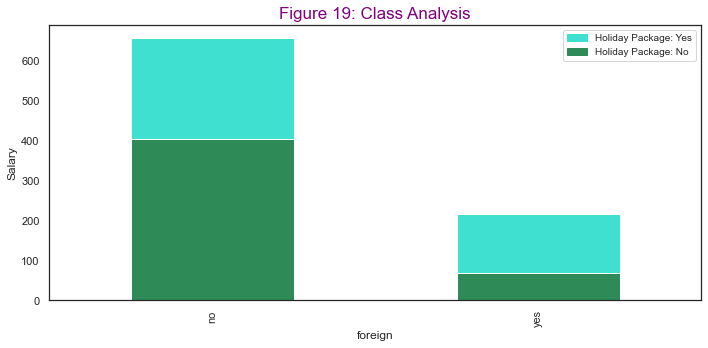

In [1231]:
cross.plot.bar(stacked = True, color = ['seagreen', 'turquoise'], figsize=(10,5))
plt.title('Figure 19: Class Analysis', color = 'purple', fontsize = 17)
plt.ylabel('Salary')

orange_patch = mpatch.Patch(color = 'turquoise', label = 'Holiday Package: Yes')
red_patch = mpatch.Patch(color = 'seagreen', label = 'Holiday Package: No')
plt.legend(handles = [orange_patch, red_patch], fontsize = 10, loc = 'upper right')

plt.tight_layout()
plt.show()

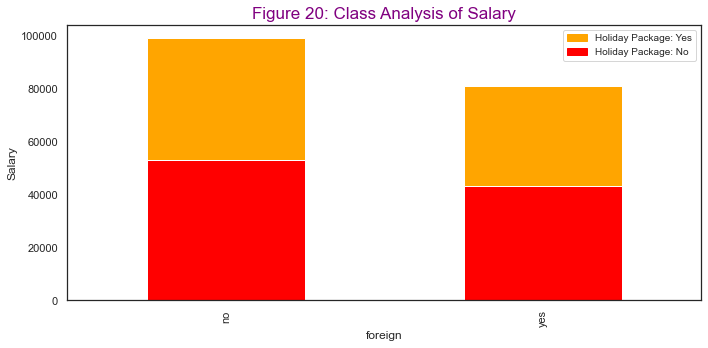

In [1232]:
cross_sal.plot.bar(stacked = True, color = ['red', 'orange'], figsize=(10,5))
plt.title('Figure 20: Class Analysis of Salary', color = 'purple', fontsize = 17)
plt.ylabel('Salary')

orange_patch = mpatch.Patch(color = 'orange', label = 'Holiday Package: Yes')
red_patch = mpatch.Patch(color = 'red', label = 'Holiday Package: No')
plt.legend(handles = [orange_patch, red_patch], fontsize = 10, loc = 'upper right')

plt.tight_layout()
plt.show()

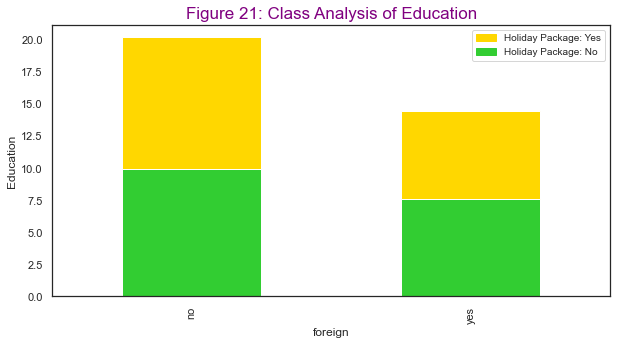

In [1233]:
cross1.plot.bar(stacked = True, color = ['limegreen', 'gold'], figsize = (10,5))
plt.legend(fontsize = 10, loc = 'upper right')
plt.title('Figure 21: Class Analysis of Education', color = 'purple', fontsize = 17)
plt.ylabel('Education')

yellow_patch = mpatch.Patch(color = 'gold', label = 'Holiday Package: Yes')
green_patch = mpatch.Patch(color = 'limegreen', label = 'Holiday Package: No')
plt.legend(handles = [yellow_patch, green_patch], fontsize = 10, loc = 'upper right')

plt.show()

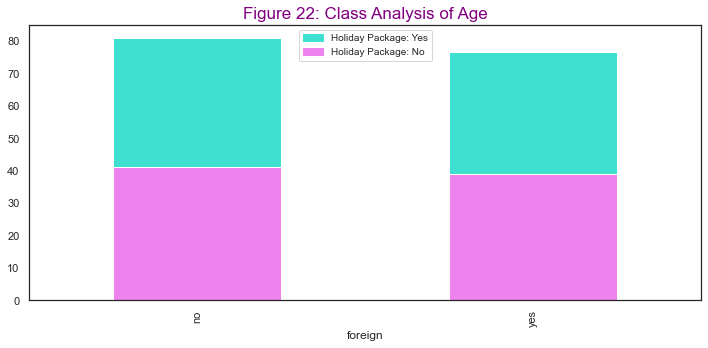

In [1234]:
cross2.plot.bar(stacked = True, color = ['violet', 'turquoise'], figsize = (10,5))
plt.title('Figure 22: Class Analysis of Age', color = 'purple', fontsize = 17)
plt.tight_layout()
#sn.set(palette = 'pastel')

turq_patch = mpatch.Patch(color = 'turquoise', label = 'Holiday Package: Yes')
violet_patch = mpatch.Patch(color = 'violet', label = 'Holiday Package: No')
plt.legend(handles = [turq_patch, violet_patch], fontsize = 10, loc = 'upper center')

plt.show()

### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [1235]:
pd.DataFrame(mydata.dtypes).T

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,object,int64,int64,int64,int64,int64,object


In [1236]:
## Encoding

for i in mydata.columns:
    if mydata[i].dtype == 'object':
        mydata[i] = pd.Categorical(mydata[i]).codes
    

In [1237]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Holliday_Package   872 non-null    int8 
 1   Salary             872 non-null    int64
 2   age                872 non-null    int64
 3   educ               872 non-null    int64
 4   no_young_children  872 non-null    int64
 5   no_older_children  872 non-null    int64
 6   foreign            872 non-null    int8 
dtypes: int64(5), int8(2)
memory usage: 35.9 KB


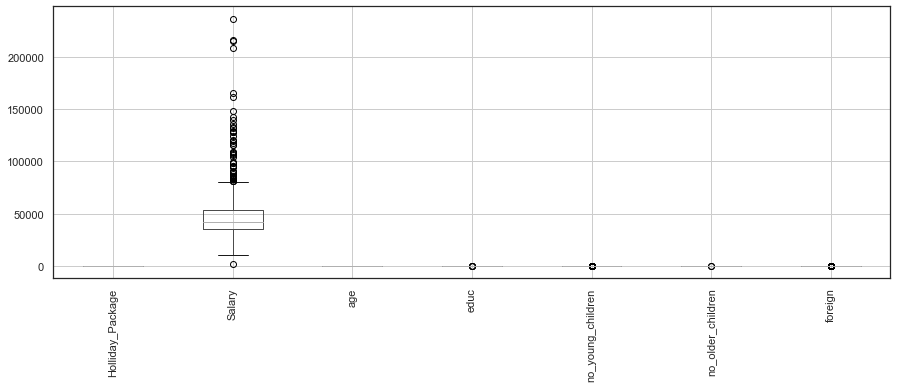

In [1238]:
mydata.boxplot(figsize = (15,5))
plt.xticks(rotation = 90)
plt.show()

In [1239]:
def outlier_treat(col):
    Q1, Q3 = np.percentile(col,[25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    return lower_range, upper_range

In [1240]:
lr, ur = outlier_treat(mydata.Salary)

mydata.Salary = np.where(mydata.Salary > ur, ur, mydata.Salary)
mydata.Salary = np.where(mydata.Salary < lr, lr, mydata.Salary)

In [1241]:
lr,ur = outlier_treat(mydata.educ)
mydata.educ = np.where(mydata.educ > ur, ur, mydata.educ)
mydata.educ = np.where(mydata.educ < lr, lr, mydata.educ)

In [1242]:
lr,ur = outlier_treat(mydata.no_older_children)
mydata.no_older_children = np.where(mydata.no_older_children > ur, ur, mydata.no_older_children)

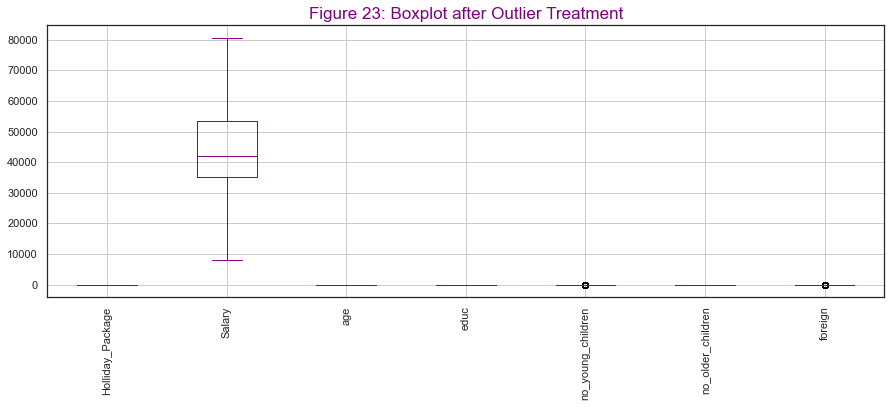

In [1243]:
mydata.boxplot(figsize = (15,5), color = 'darkmagenta')
plt.title('Figure 23: Boxplot after Outlier Treatment', color = 'purple', fontsize = 17)
plt.xticks(rotation = 90)
plt.show()

In [1244]:
x4 = mydata.drop(['Holliday_Package', 'foreign'], axis = 1)
y4 = mydata.pop('Holliday_Package')

#x1 = mydata.drop('foreign', axis = 1)
#y1 = mydata.pop('foreign')


In [1245]:
xtrain, xtest, ytrain, ytest = train_test_split(x4, y4, test_size=0.30, random_state=1)
#xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x1, y1, test_size=0.30, random_state=2)

In [1246]:
##Holiday Package

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(610, 5)
(262, 5)
(610,)
(262,)


In [1247]:
logit = LogisticRegression(random_state=1, max_iter=10000, n_jobs=2)
logit.fit(xtrain, ytrain)

LogisticRegression(max_iter=10000, n_jobs=2, random_state=1)

In [1248]:
print('Training Score is ', round(logit.score(xtrain, ytrain),2))

Training Score is  0.53


In [1166]:
print('Testing Score is ',round(logit.score(xtest, ytest),2))

Testing Score is  0.55


**Applying Grid Search**

In [1167]:
param_grid = {'penalty': ['l2', 'none'], 
              'solver': ['lbfgs', 'liblinear'],
               'tol': [0.0001, 0.00001],
             }

grid_search = GridSearchCV(estimator=logit, param_grid=param_grid, cv = 3, n_jobs=-1)

In [1168]:
grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=10000, n_jobs=2,
                                          random_state=1),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['lbfgs', 'liblinear'],
                         'tol': [0.0001, 1e-05]})

In [1169]:
best_grid_logit = grid_search.best_estimator_
best_grid_logit

LogisticRegression(max_iter=10000, n_jobs=2, random_state=1, solver='liblinear',
                   tol=1e-05)

In [1170]:
logit_pred_train = best_grid_logit.predict(xtrain)
logit_pred_test = best_grid_logit.predict(xtest)

In [1171]:
logit_pred_prob_train = best_grid_logit.predict_proba(xtrain)
logit_pred_prob_test = best_grid_logit.predict_proba(xtest)

In [99]:
#round(pd.DataFrame(logit_pred_prob_train).head().T,2)

In [1173]:
round(pd.DataFrame(logit_pred_prob_test).head().T,2)

,0,1,2,3,4
0,0.73,0.51,0.81,0.92,0.38
1,0.27,0.49,0.19,0.08,0.62


### **LDA (Linear Discriminant Analysis)**

In [1174]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(xtrain, ytrain)

LinearDiscriminantAnalysis()

In [1175]:
param_grid_lda = {
             
             'tol': [0.0001, 0.00001],

            
             }

grid_search_lda = GridSearchCV(estimator = lda_model, param_grid=param_grid_lda, cv = 5)
grid_search_lda.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(),
             param_grid={'tol': [0.0001, 1e-05]})

In [1176]:
best_lda_grid = grid_search_lda.best_estimator_

In [1177]:
best_lda_grid

LinearDiscriminantAnalysis()

In [1178]:
lda_predict_train = best_lda_grid.predict(xtrain)
lda_predict_prob_train = best_lda_grid.predict_proba(xtrain)

lda_predict_test = best_lda_grid.predict(xtest)
lda_predict_prob_test = best_lda_grid.predict_proba(xtest)

In [1179]:
round(pd.DataFrame(lda_predict_prob_test).head().T,2)

,0,1,2,3,4
0,0.73,0.47,0.76,0.93,0.4
1,0.27,0.53,0.24,0.07,0.6


In [1180]:
#!pd.DataFrame(lda_predict_prob_test).head()

### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

In [1181]:
print('For Logistic Regression model -')
print('Accuracy for Trained Data is: ', round(best_grid_logit.score(xtrain, ytrain),2))
print('Accuracy for Test Data is: ', round(best_grid_logit.score(xtest, ytest),2))

For Logistic Regression model -
Accuracy for Trained Data is:  0.66
Accuracy for Test Data is:  0.67


In [1182]:
print('For LDA Regression model -')
print('Accuracy for Trained Data is: ', round(best_lda_grid.score(xtrain, ytrain),2))
print('Accuracy for Test Data is: ', round(best_lda_grid.score(xtest, ytest),2))

For LDA Regression model -
Accuracy for Trained Data is:  0.62
Accuracy for Test Data is:  0.66


In [1183]:
#round(pd.DataFrame(logit_pred_prob_test),2).head()

In [1184]:
#round(pd.DataFrame(lda_predict_prob_test),2).head()

              precision    recall  f1-score   support

           0       0.66      0.75      0.70       326
           1       0.66      0.55      0.60       284

    accuracy                           0.66       610
   macro avg       0.66      0.65      0.65       610
weighted avg       0.66      0.66      0.65       610



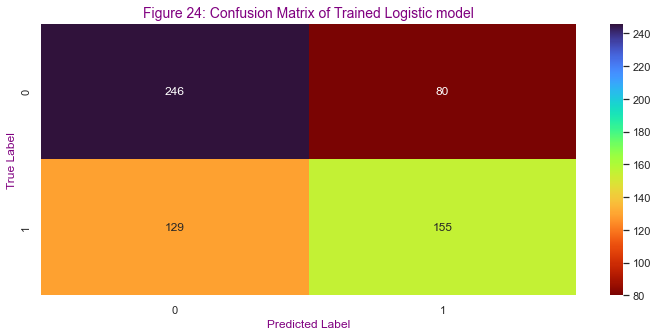

In [1185]:
plt.figure(figsize=(12,5))
sn.heatmap(confusion_matrix(ytrain, logit_pred_train), annot = True, fmt = 'd', cmap = 'turbo_r')
plt.title('Figure 24: Confusion Matrix of Trained Logistic model', color ='purple', fontsize = 14)
plt.xlabel('Predicted Label', color = 'purple')
plt.ylabel('True Label', color = 'purple')
print(classification_report(ytrain, logit_pred_train))

              precision    recall  f1-score   support

           0       0.70      0.71      0.71       145
           1       0.63      0.62      0.63       117

    accuracy                           0.67       262
   macro avg       0.67      0.67      0.67       262
weighted avg       0.67      0.67      0.67       262



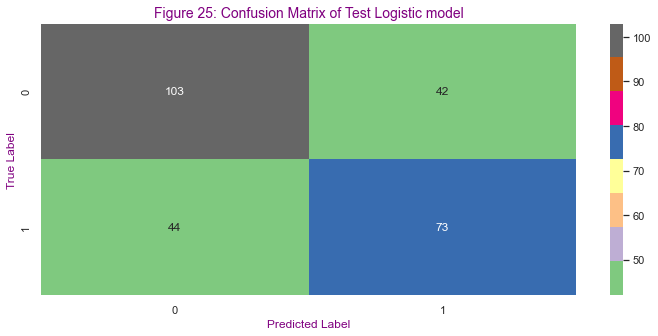

In [1186]:
plt.figure(figsize=(12,5))
sn.heatmap(confusion_matrix(ytest, logit_pred_test), annot = True, fmt = 'd', cmap = 'Accent')
plt.title('Figure 25: Confusion Matrix of Test Logistic model', color ='purple', fontsize = 14)
plt.xlabel('Predicted Label', color = 'purple')
plt.ylabel('True Label', color = 'purple')
plt.grid()
print(classification_report(ytest, logit_pred_test))

              precision    recall  f1-score   support

           0       0.64      0.68      0.66       326
           1       0.60      0.55      0.58       284

    accuracy                           0.62       610
   macro avg       0.62      0.62      0.62       610
weighted avg       0.62      0.62      0.62       610



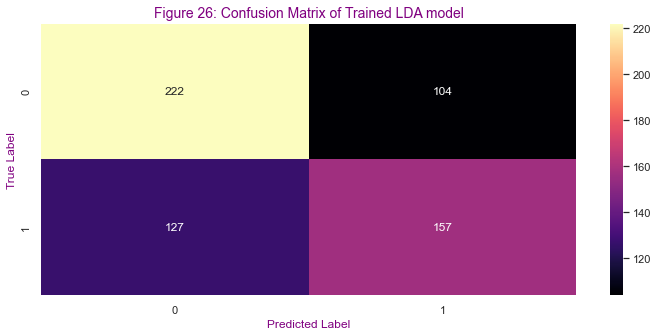

In [1187]:
plt.figure(figsize = (12,5))
sn.heatmap(confusion_matrix(ytrain, lda_predict_train), annot = True, fmt = 'd', cmap = 'magma')
plt.title('Figure 26: Confusion Matrix of Trained LDA model', color ='purple', fontsize = 14)
plt.xlabel('Predicted Label', color = 'purple')
plt.ylabel('True Label', color = 'purple')
print(classification_report(ytrain, lda_predict_train))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69       145
           1       0.61      0.64      0.63       117

    accuracy                           0.66       262
   macro avg       0.66      0.66      0.66       262
weighted avg       0.66      0.66      0.66       262



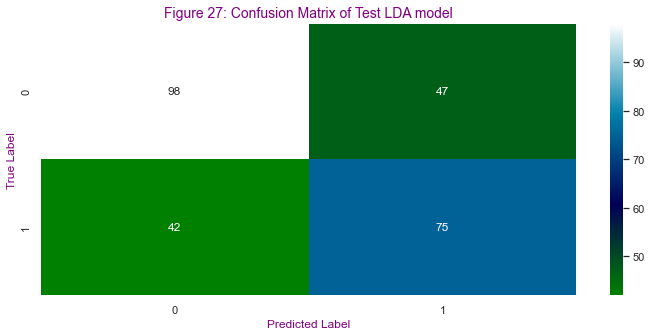

In [1188]:
plt.figure(figsize = (12,5))
sn.heatmap(confusion_matrix(ytest, lda_predict_test), annot = True, fmt = 'd', cmap = 'ocean')
plt.title('Figure 27: Confusion Matrix of Test LDA model', color ='purple', fontsize = 14)
plt.xlabel('Predicted Label', color = 'purple')
plt.ylabel('True Label', color = 'purple')
print(classification_report(ytest, lda_predict_test))

**ROC/AUC for Trained Data**

Area under the curve for Trained Logistic Regression Model is 70.22 %
Area under the curve for Trained LDA Model is 69.91 %


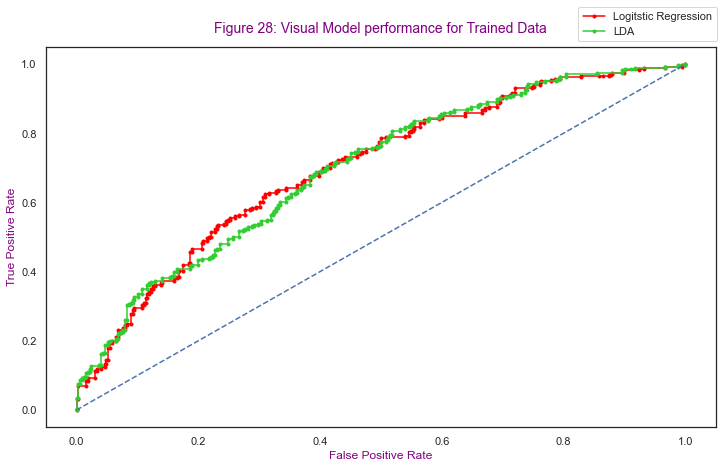

In [1190]:
## Training

prob = logit_pred_prob_train[:,1]
prob_lda = lda_predict_prob_train[:,1]

print('Area under the curve for Trained Logistic Regression Model is',round(roc_auc_score(ytrain, prob)*100,2),'%')
print('Area under the curve for Trained LDA Model is',round(roc_auc_score(ytrain, prob_lda)*100,2),'%')

plt.figure(figsize=(12,7))
fpr_logit, tpr_logit, thresholds = roc_curve(ytrain, prob)
fpr_lda, tpr_lda, thresholds = roc_curve(ytrain, prob_lda)
plt.plot(fpr_logit, tpr_logit, marker='.', label = 'Logitstic Regression', color = 'red')
plt.plot(fpr_lda, tpr_lda, marker='.', label = 'LDA', color = 'limegreen')

plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('Figure 28: Visual Model performance for Trained Data', color = 'purple', pad = 14, fontsize = 14)
plt.xlabel('False Positive Rate', color = 'purple')
plt.ylabel('True Positive Rate', color = 'purple')
plt.legend(bbox_to_anchor = (.01, 1.0, 1, .10), loc = 'lower right')
plt.show()


Area under the curve for Test Logistic Regression Model is 68.64 %
Area under the curve for Test LDA Model is 68.75 %


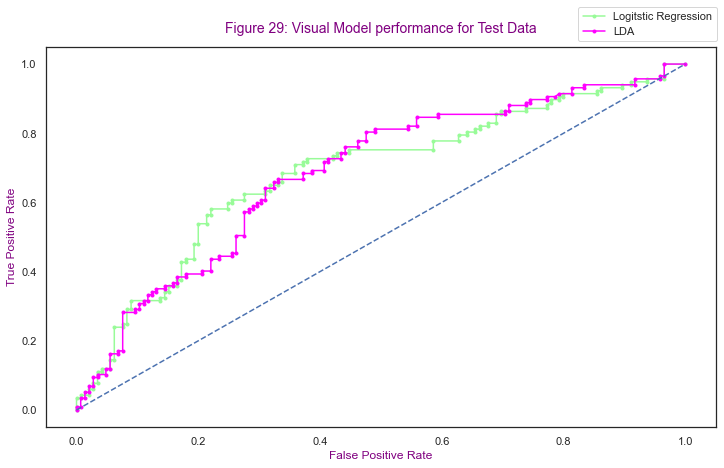

In [1192]:
## Testing

prob_logit_test = logit_pred_prob_test[:,1]
prob_lda_test = lda_predict_prob_test[:,1]

print('Area under the curve for Test Logistic Regression Model is',round(roc_auc_score(ytest, prob_logit_test)*100,2),'%')
print('Area under the curve for Test LDA Model is',round(roc_auc_score(ytest, prob_lda_test)*100,2),'%')

plt.figure(figsize=(12,7))
fpr_logit_test, tpr_logit_test, thresholds = roc_curve(ytest, prob_logit_test)
fpr_lda_test, tpr_lda_test, thresholds = roc_curve(ytest, prob_lda_test)
plt.plot(fpr_logit_test, tpr_logit_test, marker='.', label = 'Logitstic Regression', color = 'palegreen')
plt.plot(fpr_lda_test, tpr_lda_test, marker='.', label = 'LDA', color = 'magenta')

plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('Figure 29: Visual Model performance for Test Data', color = 'purple', pad = 14, fontsize = 14)
plt.xlabel('False Positive Rate', color = 'purple')
plt.ylabel('True Positive Rate', color = 'purple')
plt.legend(bbox_to_anchor = (.01, 1.0, 1, .10), loc = 'lower right')
plt.show()


In [324]:
logit_train_metrics = classification_report(ytrain, logit_pred_train, output_dict=True)
lt = pd.DataFrame(logit_train_metrics).transpose()
logit_train_precision = round(lt.loc['1'][0],2)
logit_train_recall = round(lt.loc['1'][1],2)
logit_train_f1 = round(lt.loc['1'][2],2)

lda_train_metrics = classification_report(ytrain, lda_predict_train, output_dict=True)
la = pd.DataFrame(lda_train_metrics).transpose()
lda_train_precision = round(la.loc['1'][0],2)
lda_train_recall = round(la.loc['1'][1],2)
lda_train_f1 = round(la.loc['1'][2],2)

logit_test_metrics = classification_report(ytest, logit_pred_test, output_dict=True)
lt1 = pd.DataFrame(logit_test_metrics).transpose()
logit_test_precision = round(lt1.loc['1'][0],2)
logit_test_recall = round(lt1.loc['1'][1],2)
logit_test_f1 = round(lt1.loc['1'][2],2)

lda_test_metrics = classification_report(ytest, lda_predict_test, output_dict=True)
la1 = pd.DataFrame(lda_test_metrics).transpose()
lda_test_precision = round(la1.loc['1'][0],2)
lda_test_recall = round(la1.loc['1'][1],2)
lda_test_f1 = round(la1.loc['1'][2],2)

In [325]:
index = ['Accuracy', 'AUC', 'Recall', 'Precision', 'F1 Score']

compare_data = pd.DataFrame({'LOGIT Train' : [round(accuracy_score(ytrain, logit_pred_train),2), round(roc_auc_score(ytrain, prob)*100,2), logit_train_recall, logit_train_precision, logit_train_f1],
                     'LOGIT Test' : [round(accuracy_score(ytest, logit_pred_test),2), round(roc_auc_score(ytest,prob_logit_test)*100,2), logit_test_recall, logit_test_precision, logit_test_f1],
                    
                      
                      'LDA Train' : [round(accuracy_score(ytrain, lda_predict_train),2), round(roc_auc_score(ytrain,prob_lda)*100,2), lda_train_recall, lda_train_precision, lda_train_f1],
                      'LDA Test' : [round(accuracy_score(ytest, lda_predict_test),2), round(roc_auc_score(ytest,prob_lda_test)*100,2), lda_test_recall, lda_test_precision, lda_test_f1],
                    }, 
                   
                   index = index)

**Checking feature importance for both the models**

In [1193]:
round(pd.DataFrame(best_grid_logit.coef_, columns = xtrain.columns),2)

,Salary,age,educ,no_young_children,no_older_children
0,-0.0,-0.04,0.01,-1.19,0.01


In [1194]:
round(pd.DataFrame(best_lda_grid.coef_, columns = xtrain.columns),2)

,Salary,age,educ,no_young_children,no_older_children
0,-0.0,-0.06,-0.02,-1.29,-0.05


In [1195]:
pd.DataFrame(compare_data.T)

,Accuracy,AUC,Recall,Precision,F1 Score
LOGIT Train,0.66,70.22,0.55,0.66,0.60
LOGIT Test,0.67,68.64,0.62,0.63,0.63
LDA Train,0.62,69.91,0.55,0.60,0.58
LDA Test,0.66,68.75,0.64,0.61,0.63


### **2.4 Inference: Basis on these predictions, what are the insights and recommendations.**

### Insights

**For Predicting Class 0**

**Precision:** For both the models, 70% of the employees have been predicted for not opting Holiday Package out of all employees predicted to have opted.

**Recall:** Out of all the employees who have not opted for any package, 71% has been predicted correctly for Logistic model and 68% for LDA model.

**For Predicting Class 1**

**Precision:** Out of all the employees predicted to have opted for packages, 63% has been predicted for actually opting for Holiday Package under Logistic model and 61% under LDA.

**Recall:** Under Logistic Regression, 62% of the employee predicted to have actually opted for Holiday Package out of all the employees who actually opted for Package. Similarly, 64% has been predicted correctly under LDA.

- Overall, Logistic model happens to be 67% accurate and LDA seems to be 66% accurate.


### Recommendations:

- Given dataset seems to be assymetric with extreme values present. Package as well as foreigner frequency seems to be imbalanced as data speaks more about the employees who has not opted for package and/or are not foreigners. Collecting more data may help in balancing the overall model by reducing the overalapping of data and generating more efficient results. 

- Salary with high tenure seems to be increasing however with higher occupancy, probability of opting package is low. Similarly, majority of the employees with salary more than 50000, happens to be more inclined towards not opting the package. Lucrative discounts can be leveraged by Business and/or custom packages can be made as per customer's preference/needs may drum up more sales.

- Business might want to dig deeper with employees who are not foreigners which happens to be 75% of our analysis and have high probability of not opting for Holiday package including those with high tenure, age and salary. Analyzing their travelling trends, Special Plans can be offered to such customers for the holiday season.

- Seperate Packages or Individualized package can be offered on per-project basis i.e. Monthly packages can be set with fixed costings for those who are frequent travellers however not opting for packages. Additionally, add-ons might assist in attracting new employees with special monitoring, especially with employees who are tenured and high-salaried.
